In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  KFold


In [118]:

# Load the heart disease dataset
data = pd.read_csv("heart.csv")

# Split the data into features (X) and target variable (y)
X = data.drop("target", axis=1).values
y = data["target"].values

# Feature Engineering
# Create new features through combinations or transformations of existing features
# Apply logarithmic transformation to 'chol'
X_log_chol = np.log(X[:, 4])
# Apply square root transformation to 'trestbps'
X_sqrt_trestbps = np.sqrt(X[:, 3])

# Concatenate the original features with the new features
X = np.column_stack((X, X_log_chol, X_sqrt_trestbps))


In [130]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [119]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [120]:
## check null valueS
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

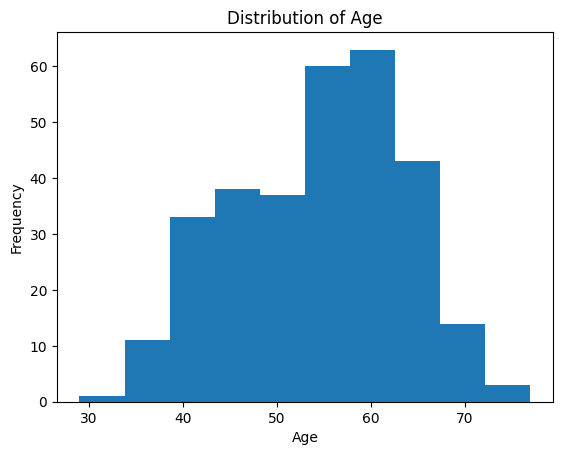

In [132]:
# Histogram of age
plt.hist(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


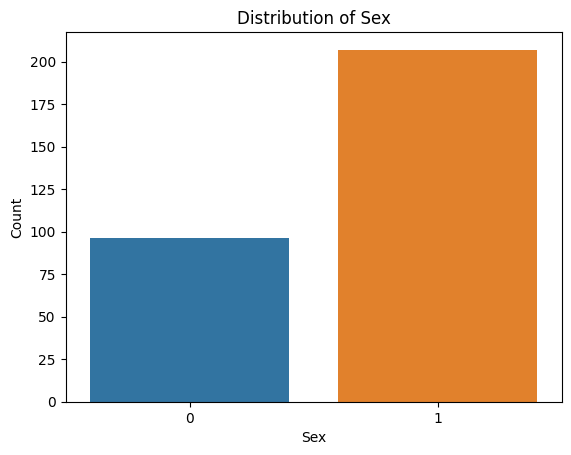

In [134]:
import seaborn as sns

# Bar plot of sex
sns.countplot(data=data, x='sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

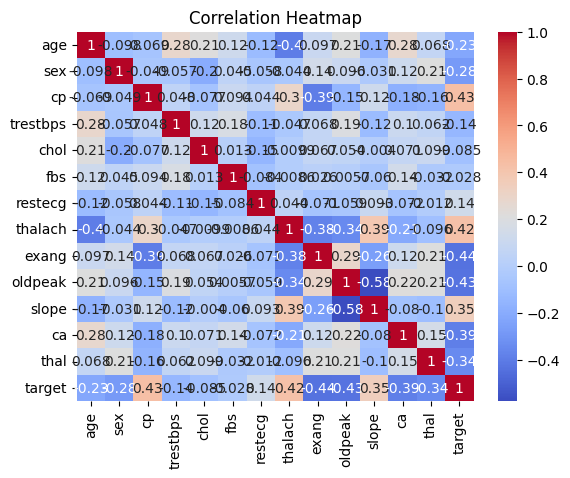

In [138]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [113]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps_sqrt,trestbps_squared,chol_log,chol_sqrt,thalach_log,thalach_sqrt,thalach_squared,oldpeak_log,oldpeak_sqrt,oldpeak_squared
0,63,1,3,145,233,1,0,150,0,2.3,...,12.041595,21025,5.451038,15.264338,5.010635,12.247449,22500,0.832909,1.516575,5.29
1,37,1,2,130,250,0,1,187,0,3.5,...,11.401754,16900,5.521461,15.811388,5.231109,13.674794,34969,1.252763,1.870829,12.25
2,41,0,1,130,204,0,0,172,0,1.4,...,11.401754,16900,5.318120,14.282857,5.147494,13.114877,29584,0.336472,1.183216,1.96
3,56,1,1,120,236,0,1,178,0,0.8,...,10.954451,14400,5.463832,15.362291,5.181784,13.341664,31684,-0.223144,0.894427,0.64
4,57,0,0,120,354,0,1,163,1,0.6,...,10.954451,14400,5.869297,18.814888,5.093750,12.767145,26569,-0.510826,0.774597,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,11.832160,19600,5.484797,15.524175,4.812184,11.090537,15129,-1.609438,0.447214,0.04
299,45,1,3,110,264,0,1,132,0,1.2,...,10.488088,12100,5.575949,16.248077,4.882802,11.489125,17424,0.182322,1.095445,1.44
300,68,1,0,144,193,1,1,141,0,3.4,...,12.000000,20736,5.262690,13.892444,4.948760,11.874342,19881,1.223775,1.843909,11.56
301,57,1,0,130,131,0,1,115,1,1.2,...,11.401754,16900,4.875197,11.445523,4.744932,10.723805,13225,0.182322,1.095445,1.44


In [121]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [122]:

# Logistic Regression from Scratch

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function - Binary Cross Entropy with L1 and L2 Regularization
def loss_function(y_true, y_pred, weights, lambda_l1, lambda_l2):
    num_samples = len(y_true)
    regularization_term = lambda_l1 * np.sum(np.abs(weights)) + lambda_l2 * np.sum(np.square(weights))
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    regularized_loss = loss + regularization_term / (2 * num_samples)
    return regularized_loss

# Gradient descent optimization with L1 and L2 Regularization
def gradient_descent(X, y, learning_rate, num_iterations, lambda_l1, lambda_l2):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    losses = []
    for _ in range(num_iterations):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)
        error = predictions - y
        gradient = np.dot(X.T, error) / num_samples
        weights -= learning_rate * gradient
        loss = loss_function(y, predictions, weights, lambda_l1, lambda_l2)
        losses.append(loss)
    return weights, losses



In [140]:
# Model Training with L1 Regularization
learning_rate = 0.01
num_iterations = 10000
lambda_l1 = 0.1
lambda_l2 = 0
weights_l1, losses1 = gradient_descent(X_train_scaled, y_train, learning_rate, num_iterations, lambda_l1, lambda_l2)

# Model Prediction with L1 Regularization
train_scores_l1 = np.dot(X_train_scaled, weights_l1)
train_predictions_l1 = np.round(sigmoid(train_scores_l1))
test_scores_l1 = np.dot(X_test_scaled, weights_l1)
test_predictions_l1 = np.round(sigmoid(test_scores_l1))

# Model Evaluation with L1 Regularization
train_accuracy_l1 = accuracy_score(y_train, train_predictions_l1)
test_accuracy_l1 = accuracy_score(y_test, test_predictions_l1)
print("train_accuracy_l1 : ",train_accuracy_l1)
print("test_accuracy_l1",test_accuracy_l1)



train_accuracy_l1 :  0.8677685950413223
test_accuracy_l1 0.8360655737704918


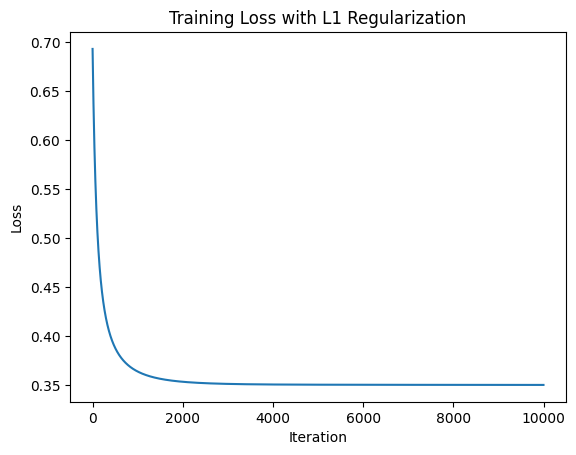

In [139]:
# Plot the losses
plt.plot(range(len(losses1)), losses1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss with L1 Regularization')
plt.show()

In [141]:


# Model Training with L2 Regularization
lambda_l1 = 0
lambda_l2 = 0.1
weights_l2, losses2= gradient_descent(X_train_scaled, y_train, learning_rate, num_iterations, lambda_l1, lambda_l2)

# Model Prediction with L2 Regularization
train_scores_l2 = np.dot(X_train_scaled, weights_l2)
train_predictions_l2 = np.round(sigmoid(train_scores_l2))
test_scores_l2 = np.dot(X_test_scaled, weights_l2)
test_predictions_l2 = np.round(sigmoid(test_scores_l2))

# Model Evaluation with L2 Regularization
train_accuracy_l2 = accuracy_score(y_train, train_predictions_l2)
test_accuracy_l2 = accuracy_score(y_test, test_predictions_l2)

print("train_accuracy_l2 : ",train_accuracy_l2)
print("test_accuracy_l2",test_accuracy_l2)



train_accuracy_l2 :  0.8677685950413223
test_accuracy_l2 0.8360655737704918


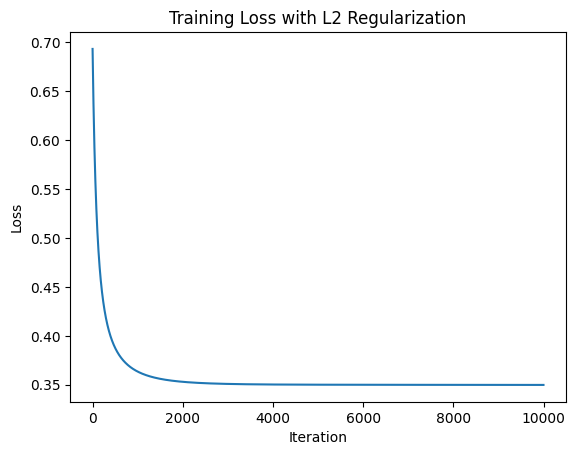

In [142]:
# Plot the losses
plt.plot(range(len(losses2)), losses2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss with L2 Regularization')
plt.show()

In [127]:
# Print the results
print("L1 Regularization:")
print("Training Accuracy:", train_accuracy_l1)
print("Test Accuracy:", test_accuracy_l1)
print()
print("L2 Regularization:")
print("Training Accuracy:", train_accuracy_l2)
print("Test Accuracy:", test_accuracy_l2)

# Compare the accuracies
if test_accuracy_l1 > test_accuracy_l2:
    print("L1 Regularization has a higher test accuracy.")
elif test_accuracy_l1 < test_accuracy_l2:
    print("L2 Regularization has a higher test accuracy.")
else:
    print("L1 and L2 Regularization have the same test accuracy.")


L1 Regularization:
Training Accuracy: 0.8677685950413223
Test Accuracy: 0.8360655737704918

L2 Regularization:
Training Accuracy: 0.8677685950413223
Test Accuracy: 0.8360655737704918
L1 and L2 Regularization have the same test accuracy.


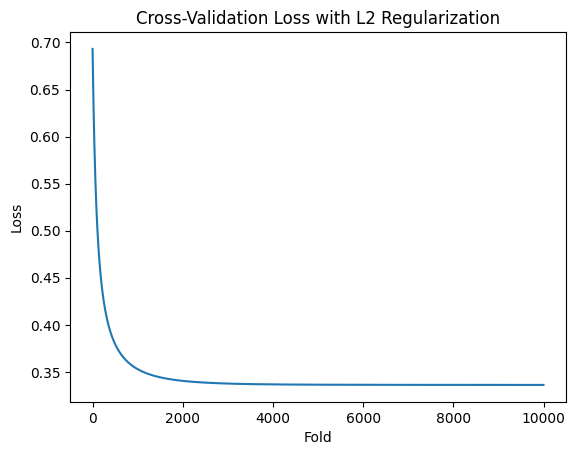

Cross-Validation Average Accuracy: 0.79328231292517
Cross-Validation Accuracy Standard Deviation: 0.01447177986360871


In [128]:

# Cross-Validation
k = 5  # Number of folds for cross-validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)

cv_accuracies = []
for train_index, val_index in cv.split(X_train_scaled):
    X_train_cv, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val = y_train[train_index], y_train[val_index]
    weights_cv, losses_cv = gradient_descent(X_train_cv, y_train_cv, learning_rate, num_iterations, lambda_l1, 0)
    val_scores = np.dot(X_val, weights_cv)
    val_predictions = np.round(sigmoid(val_scores))
    cv_accuracy = accuracy_score(y_val, val_predictions)
    cv_accuracies.append(cv_accuracy)

cv_avg_accuracy = np.mean(cv_accuracies)
cv_std_accuracy = np.std(cv_accuracies)
# Plot the losses
plt.plot(range(len(losses_cv)), losses_cv)
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Cross-Validation Loss with L2 Regularization')
plt.show()
# Print the results
print("Cross-Validation Average Accuracy:", cv_avg_accuracy)
print("Cross-Validation Accuracy Standard Deviation:", cv_std_accuracy)



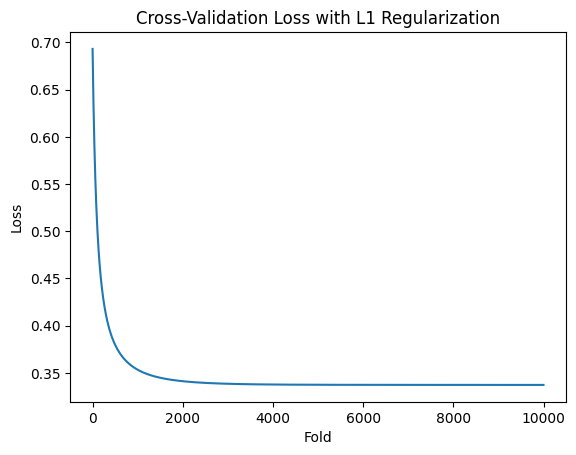

Cross-Validation Average Accuracy: 0.79328231292517
Cross-Validation Accuracy Standard Deviation: 0.01447177986360871


In [144]:

# Cross-Validation
k = 5  # Number of folds for cross-validation
cv = KFold(n_splits=k, shuffle=True, random_state=42)

cv_accuracies = []
for train_index, val_index in cv.split(X_train_scaled):
    X_train_cv, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val = y_train[train_index], y_train[val_index]
    weights_cv, losses_cv = gradient_descent(X_train_cv, y_train_cv, learning_rate, num_iterations, 0, lambda_l2)
    val_scores = np.dot(X_val, weights_cv)
    val_predictions = np.round(sigmoid(val_scores))
    cv_accuracy = accuracy_score(y_val, val_predictions)
    cv_accuracies.append(cv_accuracy)

cv_avg_accuracy = np.mean(cv_accuracies)
cv_std_accuracy = np.std(cv_accuracies)
# Plot the losses
plt.plot(range(len(losses_cv)), losses_cv)
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Cross-Validation Loss with L1 Regularization')
plt.show()
# Print the results
print("Cross-Validation Average Accuracy:", cv_avg_accuracy)
print("Cross-Validation Accuracy Standard Deviation:", cv_std_accuracy)



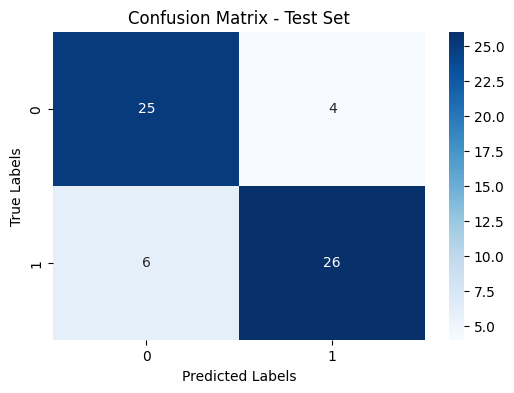

In [129]:

# Generate a confusion matrix for the test set
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, test_predictions)

# Visualize the confusion matrix
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()